## Vilnius real estate used Apartment market analysis

* Purpose: analyse Vilnius real estate pricing changes during Covid-19 and post-Covid period (est. 2020.05-2020.08)
* Hypothesis: The uncertainty brought by Covid-19 should bring fluctuations in Vilnius real estate selling and renting markets.
* Predictions:
  * 1. Increase in supply for apartments selling due to short-term rent demand drop.
  * 2. Decrease in prices due to plummeting demand and increase of supply due to point one.

* Scope: data from one of main the Lithuanian real estate market portals used.
* Data loaded weekly to monitor market changes.
* New apartments (year > 2019) are excluded from analysis as only partial data of their full supply and pricing are  available.
### Weak points
* The apartments being sold data is available from April. A better picture would have been having the data from as early as January.
* The apartments being rented data is available from May. A better picture would also require early data, such as start of 2020.
* Spikes in weeks' data possible. Preferred way would be to load data daily and smooth out edges with weekly averages. Daily scrapping is not possible however.
* There exists a practice of same apartment postings in multiple districts, that contributes to duplicate data. This duplicate data for the moment remains in dataset to support analysis splitting data into districts. 
* More sources could be included for analysis. This however can also result in duplicates.


### Importing initial preparation of data

In [1]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
from toai.imports import *
%matplotlib notebook
#import REP_Functions as rf

C:\Users\tiesi\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
C:\Users\tiesi\Anaconda3\lib\site-packages\toai\imports.py:79: UserWarning: Could not find kaggle.json. Make sure it's located in C:\Users\tiesi\.kaggle. Or use the environment method.
  warnings.warn(str(error))


In [33]:
#load the raw data:
df_raw = pd.read_excel(r'C:\Users\tiesi\Class D\Real Estate Analysis Project\Data.xlsx', index_col=0) 
#remove data from new apartments:
df_raw = df_raw[df_raw['year']< 2019]
#remove data from exceptionally big apartments(projects):
df_raw = df_raw[df_raw['space_sq_m']< 120]
#keep only selling apartments (type = 1)  data:
df_raw = df_raw[df_raw['type'] == 1]
#update column types:
df_raw['log_date'] = pd.to_datetime(df_raw['log_date'])

#create week column
df_raw['week'] = df_raw['log_date'].dt.week


#select the columns for analysis
df_columns = ['ID', 'log_date', 'district', 'year', 'total_price',
       'price_sq_m', 'nr_rooms', 'space_sq_m', 'floor', 'nr_floors', 'state', 'type', 'week']

df_raw = df_raw[df_columns]

KeyError: "['ID'] not in index"

In [24]:
#df_raw.shape

#df_raw[df_raw['log_date']=='2020-06-17']
# df = df_raw[0:1].copy()
# df = df.reset_index()
# df = df.drop(df.index[0])

#df = pd.DataFrame(data=None, columns=df_raw.columns,index=df_raw.index)
#pd.DataFrame().reindex_like(df)

# date = '2020-06-17'

# df_temp = df_raw[df_raw['log_date'] == date]
# df_temp = df_temp[(df_temp['price_sq_m'] > Q1 - 1.5 * IQR)]
# df_temp = df_temp[(df_temp['price_sq_m'] < Q3 + 1.5 * IQR)]
# print(df_temp.shape)
# df = df.append(df_temp)
# df.shape


Working the outlayers
* Quantiles will be calculated individually for each day when the data was collected.
* Bottom 5 and top 5 % of the data will be removed from each day to improve quality of results.

In [103]:
# df = pd.DataFrame(data=None, columns=df_raw.columns)
# df
# date = '2020-06-17'

# df_raw[df_raw['log_date'] == date][(df_raw['price_sq_m'] > Q1 - 1.5 * IQR) & (df_raw['price_sq_m'] < Q3 + 1.5 * IQR)]

In [44]:
# df = pd.DataFrame(data=None, columns=df_raw.columns, index=df_raw.index)

# Q1 = df_raw['price_sq_m'].quantile(.25) 
# Q3 = df_raw['price_sq_m'].quantile(.75) 

# df = df_raw[df_raw['log_date'] == '2020-06-17'][df_raw['price_sq_m'] > Q1 - 1.5 * IQR]
# df = df_raw[df_raw['log_date'] == '2020-06-17'][df_raw['price_sq_m'] < Q3 + 1.5 * IQR]
# df
#df2 = df_raw[~((df_raw < (Q1 - 1.5 * IQR)) |(df_raw > (Q3 + 1.5 * IQR))).any(axis=1)]

In [39]:
#getting all the dates
log_dates = set(df_raw['week'])
#print(sorted(log_dates))

#creating an analysis table where data without outlyers will be put
#df = pd.DataFrame(data=None, columns=df_raw.columns) #, index=df_raw.index 
df = df_raw[0:1].copy()
df = df.reset_index()
df = df.drop(df.index[0])

#preparing the quantiles range dataframe
column_names = ['Q1','Q2','Q3','Q4','IQR', 
                'Skewness_w_outlyers','Skewness', 
                'Mean_w_outlyers', 'Mean',
                'Median_w_outlyers', 'Median',
                'nr_objects_w_outlyers', 'nr_objects']
quantiles_range = pd.DataFrame(columns = column_names)

for week in sorted(log_dates):
    Q1 = df_raw['price_sq_m'][df_raw['week'] == week].quantile(.05) 
    Q2 = df_raw['price_sq_m'][df_raw['week'] == week].quantile(.25) 
    Q3 = df_raw['price_sq_m'][df_raw['week'] == week].quantile(.75) 
    Q4 = df_raw['price_sq_m'][df_raw['week'] == week].quantile(.95)
    Skewness1 = df_raw['price_sq_m'][df_raw['week'] == week].skew()
    Mean1 = df_raw['price_sq_m'][df_raw['week'] == week].mean()
    Median1 = df_raw['price_sq_m'][df_raw['week'] == week].median()
    IQR = Q3 - Q2
    df_temp = df_raw[df_raw['week'] == week]
    df_temp = df_temp[(df_temp['price_sq_m'] > Q1 - 1.25 * IQR)]
    df_temp = df_temp[(df_temp['price_sq_m'] < Q3 + 1.25 * IQR)]
    df = df.append(df_temp, sort=False)
    
    #df_temp = df_raw[df_raw['log_date'] == date][(df_raw['price_sq_m'] > Q1 - 1.5 * IQR) & (df_raw['price_sq_m'] < Q3 + 1.5 * IQR)]
    #df.append(df_temp)
    #df = df_raw[~((df_raw < (Q1 - 1.5 * IQR)) |(df_raw > (Q3 + 1.5 * IQR))).any(axis=1)]
    #adding data without outlyers to new table
#df = df_raw[df_raw['log_date'] == date][(df_raw['price_sq_m'] > Q1 - 1.5 * IQR) & (df_raw['price_sq_m'] < Q3 + 1.5 * IQR)]
    #df = df_raw[df_raw['log_date'] == date][df_raw['price_sq_m'] < Q3 + 1.5 * IQR]
#     df = df_raw[df_raw['price_sq_m'] > Q1]
#     df = df_raw[df_raw['price_sq_m'] < Q4]
    Skewness2 = df['price_sq_m'][df['week'] == week].skew()
    Mean2 = df['price_sq_m'][df['week'] == week].mean()
    Median2 = df['price_sq_m'][df['week'] == week].median()
    nr_objects_w_outlyers = df_raw['price_sq_m'][df_raw['week'] == week].count()
    nr_objects = df['price_sq_m'][df['week'] == week].count()
    quantiles_range = quantiles_range.append(pd.Series(data={'Q1': Q1,
                                                             'Q2': Q2,
                                                             'Q3' : Q3,
                                                             'Q4': Q4,
                                                             'IQR': IQR,
                                                             'Skewness_w_outlyers': Skewness1,
                                                             'Skewness': Skewness2,
                                                             'Mean_w_outlyers': Mean1,
                                                             'Mean': Mean2,
                                                             'Median_w_outlyers':Median1,
                                                             'Median':Median2,
                                                             'nr_objects_w_outlyers': nr_objects_w_outlyers,
                                                             'nr_objects': nr_objects
                                                            }, name=(week)))


In [19]:
#getting all the dates
log_dates = set(df_raw['log_date'])
#print(sorted(log_dates))

#creating an analysis table where data without outlyers will be put
#df = pd.DataFrame(data=None, columns=df_raw.columns) #, index=df_raw.index 
df = df_raw[0:1].copy()
df = df.reset_index()
df = df.drop(df.index[0])

#preparing the quantiles range dataframe
column_names = ['Q1','Q2','Q3','Q4','IQR', 
                'Skewness_w_outlyers','Skewness', 
                'Mean_w_outlyers', 'Mean',
                'Median_w_outlyers', 'Median',
                'nr_objects_w_outlyers', 'nr_objects']
quantiles_range = pd.DataFrame(columns = column_names)

for date in sorted(log_dates):
    Q1 = df_raw['price_sq_m'][df_raw['log_date'] == date].quantile(.05) 
    Q2 = df_raw['price_sq_m'][df_raw['log_date'] == date].quantile(.25) 
    Q3 = df_raw['price_sq_m'][df_raw['log_date'] == date].quantile(.75) 
    Q4 = df_raw['price_sq_m'][df_raw['log_date'] == date].quantile(.95)
    Skewness1 = df_raw['price_sq_m'][df_raw['log_date'] == date].skew()
    Mean1 = df_raw['price_sq_m'][df_raw['log_date'] == date].mean()
    Median1 = df_raw['price_sq_m'][df_raw['log_date'] == date].median()
    IQR = Q3 - Q2
    df_temp = df_raw[df_raw['log_date'] == date]
    df_temp = df_temp[(df_temp['price_sq_m'] > Q1 - 1.25 * IQR)]
    df_temp = df_temp[(df_temp['price_sq_m'] < Q3 + 1.25 * IQR)]
    df = df.append(df_temp, sort=False)
    
    #df_temp = df_raw[df_raw['log_date'] == date][(df_raw['price_sq_m'] > Q1 - 1.5 * IQR) & (df_raw['price_sq_m'] < Q3 + 1.5 * IQR)]
    #df.append(df_temp)
    #df = df_raw[~((df_raw < (Q1 - 1.5 * IQR)) |(df_raw > (Q3 + 1.5 * IQR))).any(axis=1)]
    #adding data without outlyers to new table
#df = df_raw[df_raw['log_date'] == date][(df_raw['price_sq_m'] > Q1 - 1.5 * IQR) & (df_raw['price_sq_m'] < Q3 + 1.5 * IQR)]
    #df = df_raw[df_raw['log_date'] == date][df_raw['price_sq_m'] < Q3 + 1.5 * IQR]
#     df = df_raw[df_raw['price_sq_m'] > Q1]
#     df = df_raw[df_raw['price_sq_m'] < Q4]
    Skewness2 = df['price_sq_m'][df['log_date'] == date].skew()
    Mean2 = df['price_sq_m'][df['log_date'] == date].mean()
    Median2 = df['price_sq_m'][df['log_date'] == date].median()
    nr_objects_w_outlyers = df_raw['price_sq_m'][df_raw['log_date'] == date].count()
    nr_objects = df['price_sq_m'][df['log_date'] == date].count()
    quantiles_range = quantiles_range.append(pd.Series(data={'Q1': Q1,
                                                             'Q2': Q2,
                                                             'Q3' : Q3,
                                                             'Q4': Q4,
                                                             'IQR': IQR,
                                                             'Skewness_w_outlyers': Skewness1,
                                                             'Skewness': Skewness2,
                                                             'Mean_w_outlyers': Mean1,
                                                             'Mean': Mean2,
                                                             'Median_w_outlyers':Median1,
                                                             'Median':Median2,
                                                             'nr_objects_w_outlyers': nr_objects_w_outlyers,
                                                             'nr_objects': nr_objects
                                                            }, name=(date)))


In [20]:
#quantiles_range['log_date'] = quantiles_range.index
quantiles_range

Q1       Q2       Q3       Q4      IQR  Skewness_w_outlyers  \
2020-04-09  863.40  1337.00  2392.00  3558.80  1055.00             1.187012   
2020-04-15  891.45  1333.00  2392.00  3498.20  1059.00             1.205190   
2020-04-22  895.20  1333.00  2358.00  3494.80  1025.00             1.263110   
2020-04-28  879.05  1345.75  2367.25  3495.65  1021.50             1.210658   
2020-05-08  869.50  1346.00  2382.50  3499.00  1036.50             1.139621   
2020-05-13  861.50  1325.25  2374.50  3500.00  1049.25             1.142626   
2020-05-19  877.65  1333.25  2364.75  3497.40  1031.50             1.170434   
2020-05-26  877.65  1327.25  2350.00  3497.40  1022.75             1.250550   
2020-06-03  880.25  1327.75  2338.00  3497.00  1010.25             1.273209   
2020-06-10  895.90  1331.00  2348.00  3528.80  1017.00             1.255566   
2020-06-17  894.40  1328.00  2343.00  3575.40  1015.00             1.216751   
2020-06-24  895.15  1325.00  2360.25  3548.80  1035.25             1.151173   
2020-07-02  911.00  1332.00  2370.00  3557.50  1038.00             1.133216   
2020-07-09  909.00  1335.00  2373.00  3599.00  1038.00             1.128237   
2020-07-16  909.00  1342.00  2419.00  3636.00  1077.00             1.074327   

            Skewness  Mean_w_outlyers         Mean  Median_w_outlyers  Median  \
2020-04-09  0.511237      1933.772850  1829.510710             1750.0  1714.5   
2020-04-15  0.537423      1934.489947  1834.273678             1749.0  1712.5   
2020-04-22  0.552489      1917.371208  1805.968784             1722.0  1686.5   
2020-04-28  0.519839      1927.864329  1817.768617             1741.0  1704.0   
2020-05-08  0.526351      1927.922556  1824.539161             1732.5  1700.0   
2020-05-13  0.523221      1920.484805  1815.879028             1725.5  1696.0   
2020-05-19  0.526714      1917.383786  1813.914384             1725.5  1693.5   
2020-05-26  0.562457      1909.443361  1802.473786             1721.0  1680.5   
2020-06-03  0.554489      1908.496289  1797.483244             1714.0  1669.0   
2020-06-10  0.577002      1922.711904  1810.067508             1724.0  1681.0   
2020-06-17  0.581215      1920.561428  1805.302337             1721.0  1675.5   
2020-06-24  0.593635      1923.802731  1816.904973             1721.5  1684.0   
2020-07-02  0.584315      1930.981560  1825.029674             1728.0  1692.0   
2020-07-09  0.594806      1930.057007  1820.656546             1721.0  1684.0   
2020-07-16  0.576303      1948.434079  1850.526525             1740.0  1700.0   

            nr_objects_w_outlyers  nr_objects  
2020-04-09                 1849.0      1774.0  
2020-04-15                 1890.0      1816.0  
2020-04-22                 1945.0      1858.0  
2020-04-28                 1968.0      1880.0  
2020-05-08                 2066.0      1979.0  
2020-05-13                 2106.0      2017.0  
2020-05-19                 2134.0      2044.0  
2020-05-26                 2154.0      2060.0  
2020-06-03                 2156.0      2059.0  
2020-06-10                 2159.0      2059.0  
2020-06-17                 2157.0      2054.0  
2020-06-24                 2124.0      2031.0  
2020-07-02                 2115.0      2022.0  
2020-07-09                 2105.0      2009.0  
2020-07-16                 2101.0      2017.0

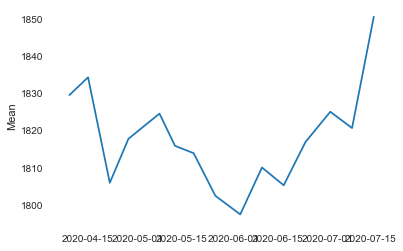

In [21]:
plt.plot(quantiles_range['Mean'])
plt.ylabel('Mean')
#axes = plt.gca()
#axes.set_xlim([0,2500])
#axes.set_ylim([1800,1850])
plt.show()

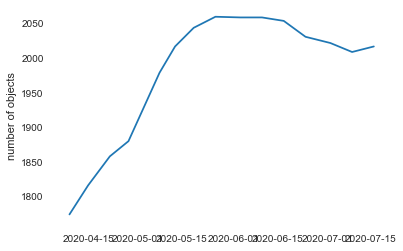

In [22]:
plt.plot(quantiles_range['nr_objects'])
plt.ylabel('number of objects')
#axes = plt.gca()
#axes.set_xlim([0,2500])
#axes.set_ylim([1500,2200])
plt.show()

In [ ]:
# plt.plot( 'log_date', 'Q1', data=quantiles_range, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
# plt.plot( 'log_date', 'Q2', data=quantiles_range, marker='', color='olive', linewidth=2)
# plt.plot( 'log_date', 'Q3', data=quantiles_range, marker='', color='olive', linewidth=2, linestyle='dashed', label="toto")
# plt.legend()

* with outlyers (min & max 5%)

* without outlyers (min & max 5%)

In [8]:
plt.boxplot(df['price_sq_m'])
plt.show()

In [9]:
plt.boxplot(df_raw['price_sq_m'])
plt.show()

## Creation of data buckets for further analysis
* 3 Different apartment size buckets will be investigated:
  * < ~46 square meters. Small apartment category.
  * 45 to 66 square meters. Medium apartment category.
  * 66 to 120 square meters. Large apartment category.
* Categorization built based on Quantile-based discretization function towards three splits.

In [10]:
df['size_bucket'] = pd.qcut(df['space_sq_m'], q=3, labels=["small", "medium", "large"])
df.groupby('size_bucket').aggregate(np.mean)

ID  is_new_project  reserved  price_change  is_auction  nr_stars  \
size_bucket                                                                     
small       NaN        0.908597  0.909234     -0.008227    0.914556  0.396043   
medium      NaN        0.915633  0.918840      0.145448    0.916638  0.491598   
large       NaN        0.908731  0.909797     -0.004869    0.910025  0.363249   

                    year    total_price   price_sq_m  rounded_price_sq_m  \
size_bucket                                                                
small        1976.418116   55948.451094  1695.796058         1697.290511   
medium       1987.711438  103210.104995  1835.674238         1837.984316   
large        1989.374439  162999.294968  1926.107711         1927.525310   

             nr_rooms  space_sq_m  rounded_space_sq_m     floor  nr_floors  \
size_bucket                                                                  
small        1.410621   32.512490           32.527057  3.175423   5.184268   
medium       2.366284   56.337471           56.328930  3.570827   6.105999   
large        3.201340   83.612540           83.618901  3.487821   5.752074   

                state  type  
size_bucket                  
small        1.836869   1.0  
medium       1.917526   1.0  
large        1.865609   1.0

#### Average supply per apartment size

In [11]:
#df_small_app = df[df['size_bucket']=='9.999, 45.84'] 
size_bucket_data = df.groupby(['size_bucket', 'log_date'])['price_sq_m'].agg(['mean', 'count'])
size_bucket_data = size_bucket_data.reset_index(level=['size_bucket', 'log_date'])
size_bucket_data = size_bucket_data.set_index('log_date')
size_bucket_data.head()
size_bucket_data2 = size_bucket_data[size_bucket_data['size_bucket'] == 'large']
size_bucket_data2
plt.figure(figsize=(20,10))
plt.plot(size_bucket_data[size_bucket_data['size_bucket'] == 'large']['count'])
plt.plot(size_bucket_data[size_bucket_data['size_bucket'] == 'medium']['count'])
plt.plot(size_bucket_data[size_bucket_data['size_bucket'] == 'small']['count'])

#plt.ylabel('Mean')
#axes = plt.gca()
#axes.set_xlim([0,2500])
#axes.set_ylim([0,700])

plt.show()

#### Average price sq m per apartment size

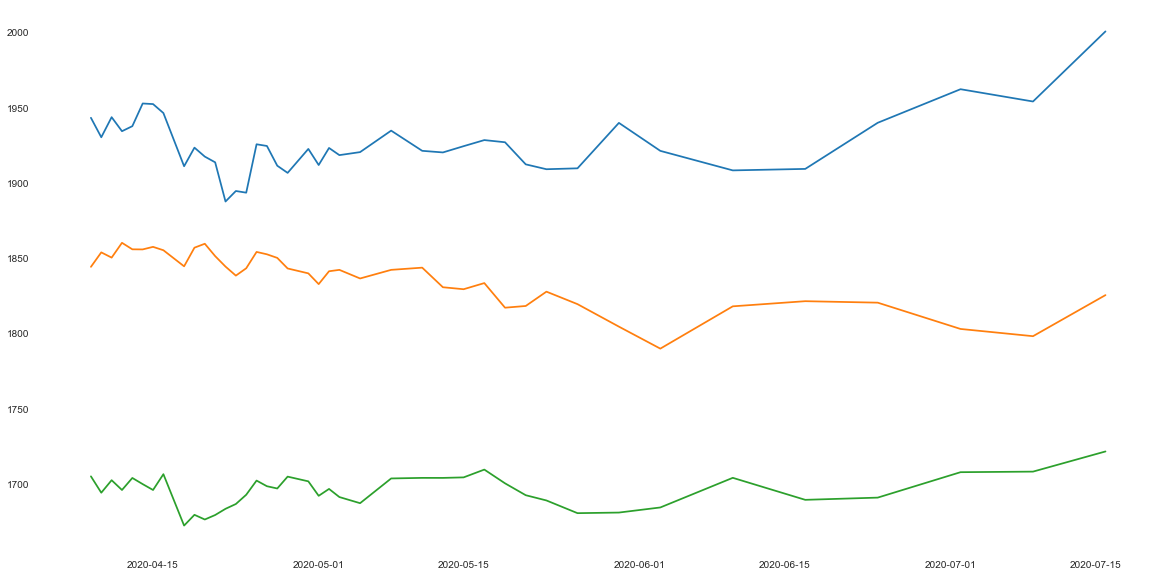

In [12]:
#df_small_app = df[df['size_bucket']=='9.999, 45.84'] 
size_bucket_data = df.groupby(['size_bucket', 'log_date'])['price_sq_m'].agg(['mean', 'count'])
size_bucket_data = size_bucket_data.reset_index(level=['size_bucket', 'log_date'])
size_bucket_data = size_bucket_data.set_index('log_date')
size_bucket_data.head()
size_bucket_data2 = size_bucket_data[size_bucket_data['size_bucket'] == 'large']
size_bucket_data2
plt.figure(figsize=(20,10))
plt.plot(size_bucket_data[size_bucket_data['size_bucket'] == 'large']['mean'])
plt.plot(size_bucket_data[size_bucket_data['size_bucket'] == 'medium']['mean'])
plt.plot(size_bucket_data[size_bucket_data['size_bucket'] == 'small']['mean'])

#plt.ylabel('Mean')
#axes = plt.gca()
#axes.set_xlim([0,2500])
#axes.set_ylim([0,700])

plt.show()

## District & street Rankings

In [13]:
#street ranking calculation
streets = df.groupby('street')['price_sq_m'].agg(['mean'])
streets['street_rank'] = pd.qcut(streets['mean'], q=10)
#district ranking calculation
districts = df.groupby('district')['price_sq_m'].agg(['mean'])
districts['district_rank'] = pd.qcut(districts['mean'], q=10)
                               
df = pd.merge(df, districts['district_rank'], on='district', how='outer')
df = pd.merge(df, streets['street_rank'], on='street', how='outer')

In [14]:
df.head()

#districts.head
# districts_ranked = df.groupby('district_rank')['price_sq_m'].agg(['count','mean'])
# districts_ranked['district_rank2'] = pd.qcut(districts_ranked['mean'], q=10)
# districts_ranked.sort_values(by=['district_rank'])


ID   log_date    district    street  is_new_project  reserved  \
0 NaN 2020-04-09  Antakalnis  Ajerų g.               0         0   
1 NaN 2020-04-10  Antakalnis  Ajerų g.               0         0   
2 NaN 2020-04-11  Antakalnis  Ajerų g.               0         0   
3 NaN 2020-04-12  Antakalnis  Ajerų g.               0         0   
4 NaN 2020-04-13  Antakalnis  Ajerų g.               1         1   

   price_change  is_auction  nr_stars  year  ...  nr_rooms  space_sq_m  \
0           0.0           0         0  2018  ...         4      113.69   
1           0.0           0         0  2018  ...         4      113.69   
2           0.0           0         0  2018  ...         4      113.69   
3           0.0           0         0  2018  ...         4      113.69   
4           0.0           1         0  2018  ...         4      113.69   

   rounded_space_sq_m  floor  nr_floors  state  type  size_bucket  \
0                 114      1          2      1     1        large   
1                 114      1          2      1     1        large   
2                 114      1          2      1     1        large   
3                 114      1          2      1     1        large   
4                 114      1          2      1     1        large   

         district_rank         street_rank  
0  (1962.83, 2068.686]  (1022.0, 1251.535]  
1  (1962.83, 2068.686]  (1022.0, 1251.535]  
2  (1962.83, 2068.686]  (1022.0, 1251.535]  
3  (1962.83, 2068.686]  (1022.0, 1251.535]  
4  (1962.83, 2068.686]  (1022.0, 1251.535]  

[5 rows x 23 columns]

In [13]:
# #df['space_sq_m']
# #df = df.reset_index()
# df['size_bucket'] = df.apply(define_size_bucket, axis=1)
# #df2['district_bucket'] = df2.apply(define_district_bucket, axis=1)

In [39]:
# #buckets calculation:
# apartment_sizes = df.groupby(['size_bucket', 'log_date']).aggregate(np.mean)
# apartment_sizes = apartment_sizes.sort_values(by=['price_sq_m'], ascending=False)
# apartment_sizes.reset_index(inplace=True)  
# apartment_sizes = apartment_sizes.set_index('log_date')
# apartment_sizes.sort_index
# #apartment_sizes

In [37]:


# #small_ap = apartment_sizes[apartment_sizes['size_bucket']==1]
# #small_ap
# plt.plot(apartment_sizes['price_sq_m'][apartment_sizes['size_bucket']==3], label='1')
# #line_down = plt.plot(apartment_sizes['price_sq_m'][apartment_sizes['size_bucket']==2], label='2')
# #plt.legend([line_up, line_down]
# #plt.plot(apartment_sizes['price_sq_m'][apartment_sizes['size_bucket']==3], label='3')
# #plt.plot(apartment_sizes['price_sq_m'][apartment_sizes['size_bucket']==4], label='4')
# #plt.plot(apartment_sizes['price_sq_m'][apartment_sizes['size_bucket']==5], label='5')
# #plt.ylabel('Mean')
# plt.show()
# #apartment_sizes['price_sq_m'][apartment_sizes['size_bucket']==1]

                                    

In [15]:
#apartment_sizes['price_sq_m'][apartment_sizes['size_bucket']==1]

## Correlation initial Analysis

In [15]:
df.columns
potentialFeatures = [ 'is_new_project', 'reserved',
       'price_change', 'is_auction', 'nr_stars', 'year', 'total_price',
       'price_sq_m', 'rounded_price_sq_m', 'nr_rooms', 'space_sq_m',
       'rounded_space_sq_m', 'floor', 'nr_floors', 'state', 'type']
    #   'size_bucket', 'district_rank', 'street_rank']
# check how the features are correlated with the price  sq m
for f in potentialFeatures:
    related = df['price_sq_m'].corr(df[f])
    print("%s: %f" % (f,related))

is_new_project: -0.003894
reserved: -0.005431
price_change: -0.004206
is_auction: -0.020176
nr_stars: 0.011835
year: 0.165626
total_price: 0.727215
price_sq_m: 1.000000
rounded_price_sq_m: 0.999147
nr_rooms: 0.085126
space_sq_m: 0.174017
rounded_space_sq_m: 0.173816
floor: -0.024747
nr_floors: -0.036587
state: 0.154020
type: nan


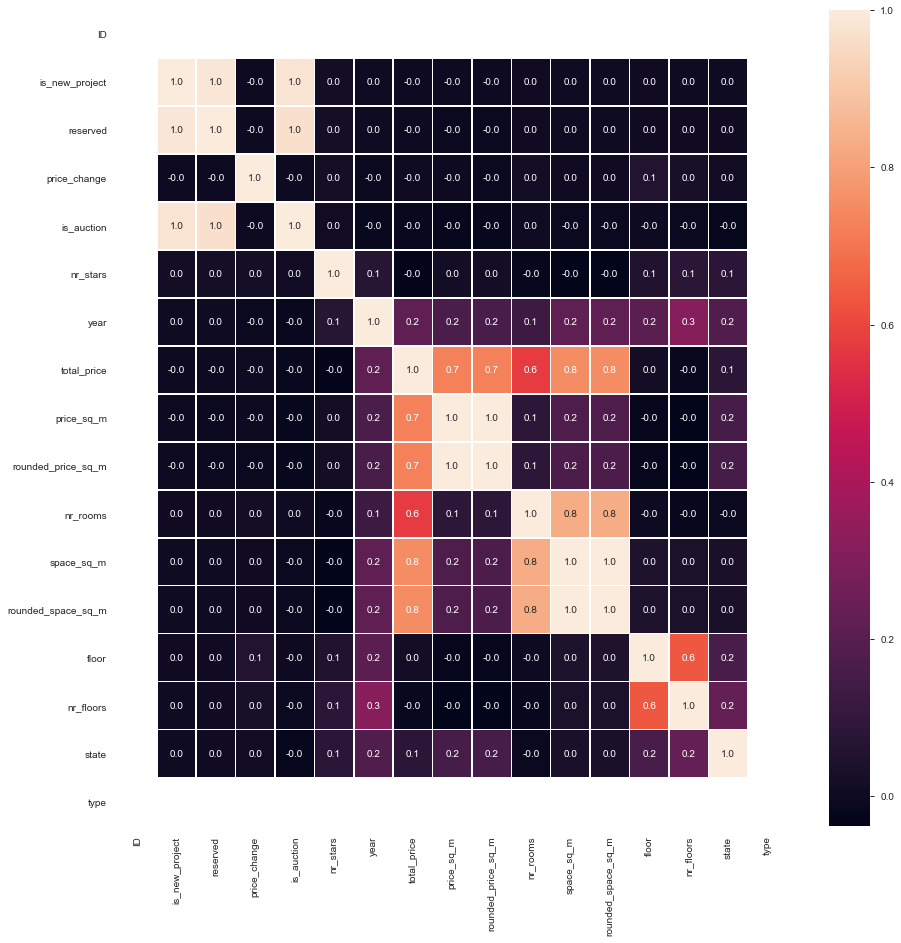

In [16]:
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

C:\Users\tiesi\AppData\Roaming\Python\Python37\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


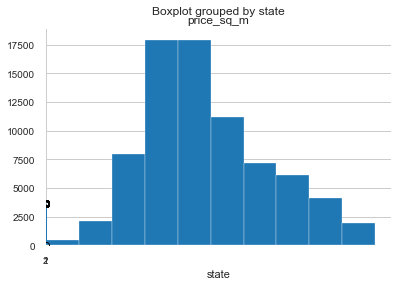

In [22]:
df.boxplot(column='price_sq_m', by='state')
df.price_sq_m.hist()

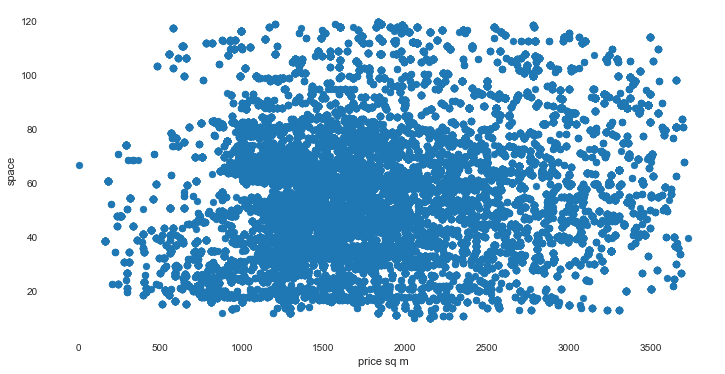

In [23]:
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(df['price_sq_m'], df['space_sq_m'])
ax.set_xlabel('price sq m')
ax.set_ylabel('space')
plt.show()

# Map work

In [30]:
import geopandas as gpd
import osmnx as ox
import networkx

Vilnius_map = "Vilnius,Lithuania"
graph = ox.graph_from_place(Vilnius_map)
networkx.classes.multidigraph.MultiDiGraph

nodes , streets_gdf = ox.graph_to_gdfs(graph)

<IPython.core.display.Javascript object>


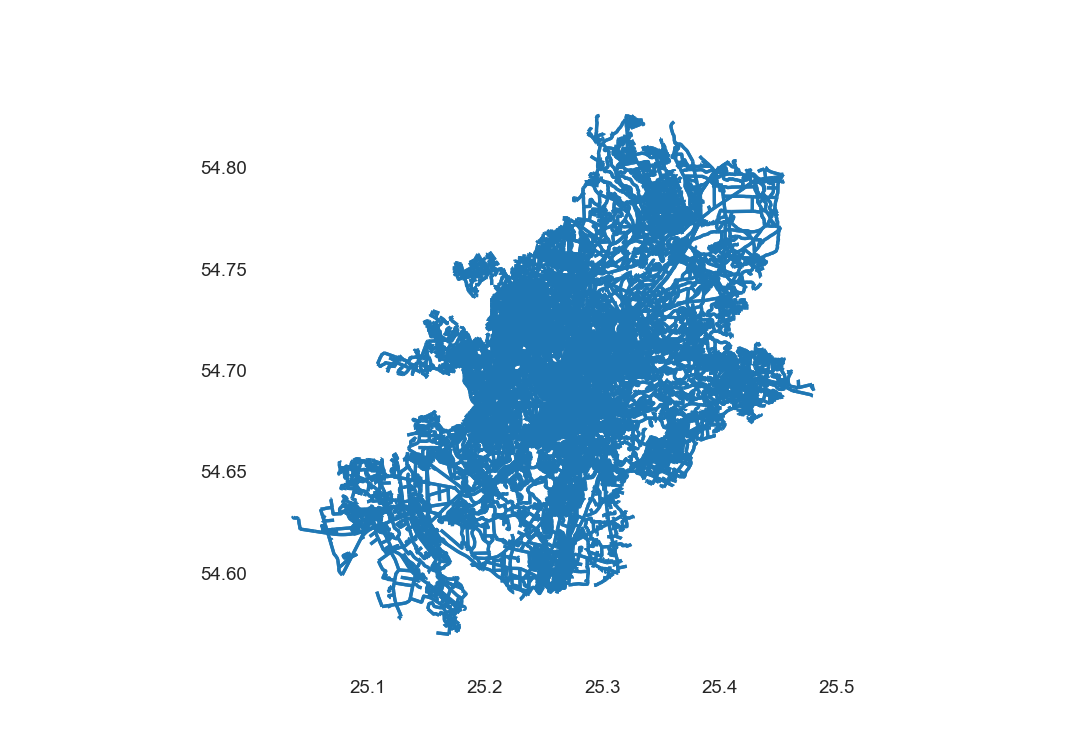

In [50]:
#streets.head()
#streets_gdf.head()
#streets_gdf = pd.merge(streets_gdf, streets['mean'], left_on='name', right_on='left')


fig2 =streets_gdf.plot()
#fig2 = plt.figure(figsize=(15,10))
#fig2.show()

osmid               name       highway  oneway   length   service  \
0  210992803     Kaniaviškių g.   residential   False   29.661       NaN   
1  210992803     Kaniaviškių g.   residential   False  123.459       NaN   
2  701261457                NaN       service   False   71.096  driveway   
3  701261457                NaN       service   False   71.096  driveway   
4  210992802  Kazio Bizausko g.  unclassified   False   33.843       NaN   

  maxspeed                                           geometry lanes  ref  \
0      NaN  LINESTRING (25.39225 54.67607, 25.39271 54.67609)   NaN  NaN   
1      NaN  LINESTRING (25.39225 54.67607, 25.39034 54.67596)   NaN  NaN   
2      NaN  LINESTRING (25.39225 54.67607, 25.39233 54.67543)   NaN  NaN   
3      NaN  LINESTRING (25.39233 54.67543, 25.39225 54.67607)   NaN  NaN   
4       50  LINESTRING (25.39792 54.67697, 25.39787 54.67727)   NaN  NaN   

  tunnel access bridge width junction           u           v  key  
0    NaN    NaN    NaN   NaN      NaN  6585974785  5632274275    0  
1    NaN    NaN    NaN   NaN      NaN  6585974785  4648073626    0  
2    NaN    NaN    NaN   NaN      NaN  6585974785  6585974786    0  
3    NaN    NaN    NaN   NaN      NaN  6585974786  6585974785    0  
4    NaN    NaN    NaN   NaN      NaN  6585974787  4587639180    0

Code below is either not used or to be used later:

In [ ]:
#Skewness
# -1 / + 1 is considered regular
print(df['price_sq_m'].skew())
df['price_sq_m'].describe()

In [ ]:
#Outlier treatment
#Quantile-based Flooring and Capping
Q1 = df['price_sq_m'].quantile(0.05)
Q3 = df['price_sq_m'].quantile(0.95)
print(Q1)
print(Q3)


data_1 = df[df['price_sq_m'] > Q1]
data_1 = df[df['price_sq_m'] < Q3]
print(data_1.shape)
#skewness differences
print(df['price_sq_m'].skew())
print(data_1['price_sq_m'].skew())


In [ ]:
#trimming
index = data[(data1['price_sq_m'] >= 3156.0)|(data['price_sq_m'] <= 1113.19)].index
data.drop(index, inplace=True)
data['price_sq_m'].describe()

In [ ]:
#IQR Score
#The rule of thumb is that anything not in the range of (Q1 - 1.5 IQR) and (Q3 + 1.5 IQR) is an outlier, and can be removed.
df3 = df['price_sq_m']

df_out = df3[~((df3 < (Q1 - 1.5 * IQR)) |(data1 > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_out.shape)

In [183]:
#date calculations
period = data_1.groupby('log_date').aggregate(np.mean)
period.head(5)

is_new_project  reserved  price_change  is_auction  nr_stars  \
log_date                                                                   
2020-04-09        0.068239  0.016792      0.039741    0.023580  0.440157   
2020-04-10        0.069414  0.016269      0.040334    0.024223  0.438539   
2020-04-11        0.065789  0.016003      0.039469    0.021693  0.390825   
2020-04-12        0.067116  0.015980      0.039712    0.021662  0.348722   
2020-04-13        1.000000  1.000000      0.040013    1.000000  0.322557   

                   year    total_price   price_sq_m  rounded_price_sq_m  \
log_date                                                                  
2020-04-09  1996.252233  122150.586995  1911.601286         1913.504823   
2020-04-10  1996.203181  121593.971800  1909.622560         1911.641359   
2020-04-11  1996.438122  122126.564367  1913.283428         1915.291607   
2020-04-12  1996.610440  122044.691761  1913.732244         1915.838068   
2020-04-13  1996.307112  121843.280532  1912.396911         1914.547414   

            nr_rooms  space_sq_m  rounded_space_sq_m     floor  nr_floors  \
log_date                                                                    
2020-04-09  2.467310   62.572008           62.574848  3.389425   6.643087   
2020-04-10  2.461678   62.394624           62.398771  3.392986   6.654736   
2020-04-11  2.466572   62.544733           62.548720  3.403627   6.656117   
2020-04-12  2.463778   62.482724           62.486506  3.400568   6.658026   
2020-04-13  2.459770   62.463696           62.465876  3.418822   6.672055   

               state  type  size_bucket  
log_date                                 
2020-04-09  1.635584   1.0     2.964987  
2020-04-10  1.626537   1.0     2.954447  
2020-04-11  1.636913   1.0     2.964794  
2020-04-12  1.634233   1.0     2.960582  
2020-04-13  1.642960   1.0     2.958693

In [ ]:

# # district buckets:
# first_tier =['Senamiestis','Žvėrynas','Užupis', 'Filaretai']
# second_tier = ['Valakampiai','Naujamiestis', 'Šnipiškės','Turniškės']
# third_tier = ['Antakalnis', 'Šiaurės miestelis','Žirmūnai', 'Burbiškės', 'Visoriai',
#             'Avižienių k.', 'Tarandės k.', 'Verkiai','Markučiai','Santariškės', 'Saulėtekis']
# fourth_tier = ['Klevinės vs.','Baltupiai','Bajorai','Lazdynėliai','Pilaitė',
# 'Šeškinė','Viršuliškės','Jeruzalė','Vilkpėdė','Liepkalnis','Karoliniškės','Pašilaičiai','Rasos',
# 'Lazdynai','Dvarčionys','Avižieniai','Justiniškės','Bendorių k.','Kalnėnai','Fabijoniškės',
# 'Bukiškio k.','Tarandė','Skaidiškės','Bukčiai','Balsiai','Naujininkai']

# def define_district_bucket(df2):
#   if df2['district'] in first_tier:
#     return 1
#   elif df2['district'] in second_tier:
#     return 2
#   elif df2['district'] in third_tier:
#     return 3
#   elif df2['district'] in fourth_tier:
#     return 4
#   else:
#     return 5

# df2['size_bucket'] =  
# 		,CASE	WHEN a.space_sq_m < 30  THEN 1
# 				WHEN a.space_sq_m >= 30 and a.space_sq_m < 50 THEN 2
# 				WHEN a.space_sq_m >= 50 and a.space_sq_m < 70 THEN 3
# 				WHEN a.space_sq_m >= 70 and a.space_sq_m < 90 THEN 4
# 				ELSE 5
# 				END AS [size_bucket]
                
#    if col[:2]=='01':
#         df.rename(columns={col:'Gold' + col[4:]}, inplace=True)
#     if col[:2]=='02':
#         df.rename(columns={col:'Silver' + col[4:]}, inplace=True)
#     if col[:2]=='03':
#         df.rename(columns={col:'Bronze' + col[4:]}, inplace=True)
#     if col[:1]=='№':
#         df.rename(columns={col:'#' + col[1:]}, inplace=True) 
                

In [ ]:
# apartment size buckets:
def define_size_bucket(df):
  if df['space_sq_m'] < 30.0:
    return 1
  elif df['space_sq_m'] > 30.0 and df['space_sq_m']< 55.0:
    return 2
  elif df['space_sq_m'] > 55.0 and df['space_sq_m']< 70.0:
    return 3
  elif df['space_sq_m'] > 70.0 and df['space_sq_m']< 90.0:
    return 4
  else:
    return 5

In [ ]:
#street ranking calculation
streets = df.groupby('street').aggregate(np.mean)
streets
streets = streets.sort_values(by=['price_sq_m'], ascending=False)
streets = streets.reset_index()
streets['street_rank'] = streets.index
streets = streets[['street','street_rank']]

#district ranking calculation
districts = df.groupby('district').aggregate(np.mean)
districts = districts.sort_values(by=['price_sq_m'], ascending=False)
districts = districts.reset_index()
districts['district_rank'] = districts.index
districts = districts[['district','district_rank']]

df = pd.merge(df, districts, on='district', how='outer')
df = pd.merge(df, streets, on='street', how='outer')
